### Objective:
Use polynomial regression to create a model for predicting employee salary based on years of experience

- Independent variable X: Years of Experience
- Dependent variable Y: Salary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data Understanding

In [2]:
salary = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\5. Polynomial Regression\\Employee_Salary.csv")

In [3]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [6]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Years of Experience,2000.0,10.739095,2.989853,1.0,8.812255,10.738822,12.785483,20.0
Salary,2000.0,111942.422469,45055.817085,40000.0,87938.130895,93376.356875,116978.641550,500000.0


In [7]:
display(salary.shape)
display(salary.columns)

(2000, 2)

Index(['Years of Experience', 'Salary'], dtype='object')

### Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

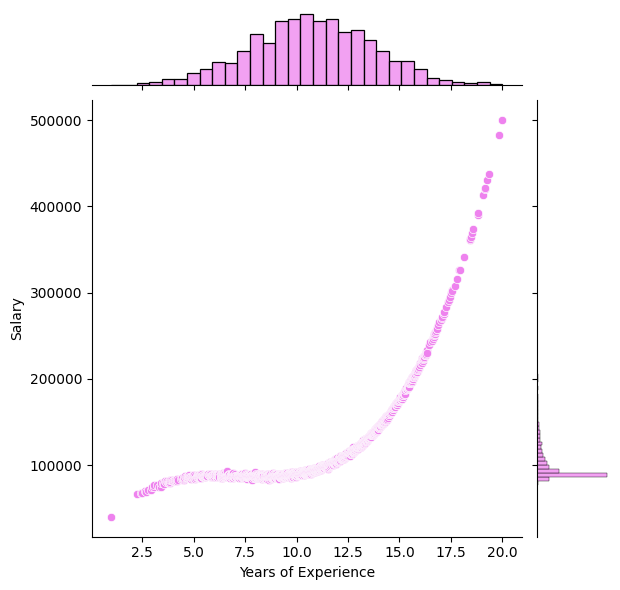

In [8]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Years of Experience', y='Salary', data=salary, color='violet')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

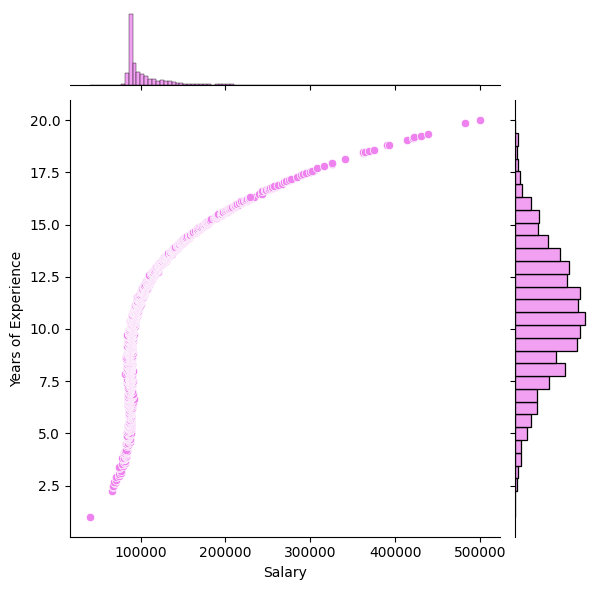

In [9]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Salary', y='Years of Experience', data=salary, color='violet')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

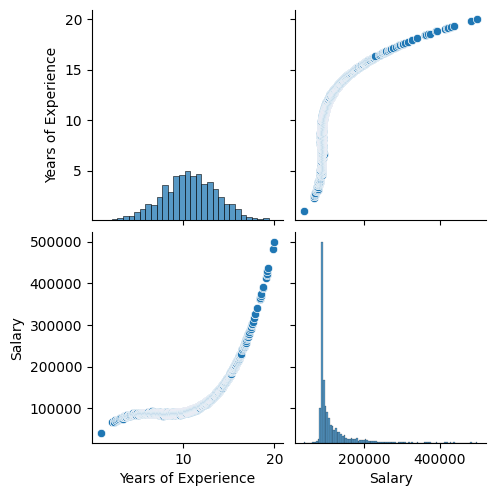

In [10]:
plt.figure(figsize=(8,6))
sns.pairplot(data=salary)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

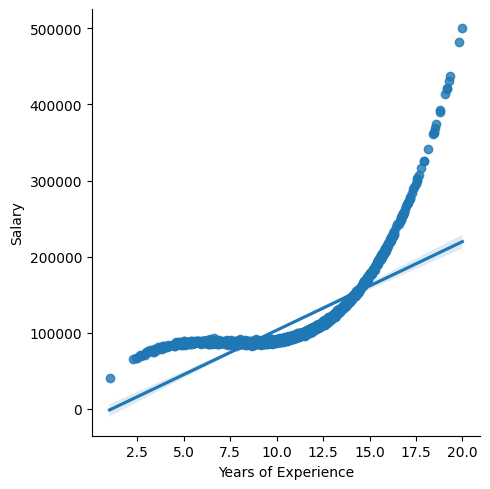

In [11]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Years of Experience', y='Salary', data=salary)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

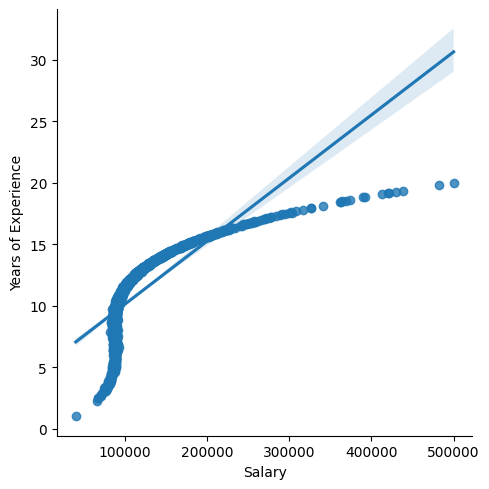

In [12]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Salary', y='Years of Experience', data=salary)
plt.show

### Creating Train and Test Set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = salary[['Years of Experience']]
y = salary['Salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Years of Experience
968,10.626381
240,7.254434
819,10.094599
692,9.604368
420,8.327626
...,...
1130,11.204824
1294,11.885532
860,10.229835
1459,12.619720


In [17]:
y_train

968      92137.56527
240      87034.86932
819      91663.61109
692      88955.14064
420      87590.55521
            ...     
1130     95481.23194
1294    105278.22270
860      90575.19170
1459    113905.38880
1126     94777.89877
Name: Salary, Length: 1600, dtype: float64

In [18]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(1600, 1)

(1600,)

(400, 1)

(400,)

### Train the Model

#### Linear Assumption

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Linear Model coeff (m):', lr.coef_)
print('Linear Model coeff (b):', lr.intercept_)

Linear Model coeff (m): [11713.90124712]
Linear Model coeff (b): -13843.362983505882


In [22]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [23]:
print('Linear Model coeff (m):', lr2.coef_)
print('Linear Model coeff (b):', lr2.intercept_)

Linear Model coeff (m): [10515.95963318]
Linear Model coeff (b): 0.0


#### Polynomial Assumption

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pl = PolynomialFeatures(degree=2)

In [26]:
X_columns = pl.fit_transform(X_train)

In [27]:
X_columns

array([[  1.        ,  10.62638057, 112.91996402],
       [  1.        ,   7.25443449,  52.6268198 ],
       [  1.        ,  10.09459946, 101.90093826],
       ...,
       [  1.        ,  10.22983549, 104.64953415],
       [  1.        ,  12.61971987, 159.2573296 ],
       [  1.        ,  11.17953631, 124.98203211]])

In [28]:
poly = LinearRegression()
poly.fit(X_columns, y_train)

LinearRegression()

In [29]:
print('Model Coeff:', poly.coef_)

Model Coeff: [     0.         -32653.27391759   2084.28020328]


In [30]:
pl5 = PolynomialFeatures(degree=5)

In [31]:
X_columns5 = pl5.fit_transform(X_train)

In [32]:
X_columns5

array([[1.00000000e+00, 1.06263806e+01, 1.12919964e+02, 1.19993051e+03,
        1.27509183e+04, 1.35496110e+05],
       [1.00000000e+00, 7.25443449e+00, 5.26268198e+01, 3.81777817e+02,
        2.76958216e+03, 2.00917524e+04],
       [1.00000000e+00, 1.00945995e+01, 1.01900938e+02, 1.02864916e+03,
        1.03838012e+04, 1.04820314e+05],
       ...,
       [1.00000000e+00, 1.02298355e+01, 1.04649534e+02, 1.07054752e+03,
        1.09515250e+04, 1.12032299e+05],
       [1.00000000e+00, 1.26197199e+01, 1.59257330e+02, 2.00978289e+03,
        2.53628970e+04, 3.20072656e+05],
       [1.00000000e+00, 1.11795363e+01, 1.24982032e+02, 1.39724117e+03,
        1.56205083e+04, 1.74630040e+05]])

In [33]:
poly5 = LinearRegression()
poly5.fit(X_columns5, y_train)

LinearRegression()

In [34]:
print('Model Coeff:', poly5.coef_)

Model Coeff: [ 0.00000000e+00  3.27993995e+04 -4.67034604e+03  2.26608037e+02
 -1.20880120e+00  2.49133094e-02]


### Visualize the Results

In [35]:
y_pred_lr = lr.predict(X_train)

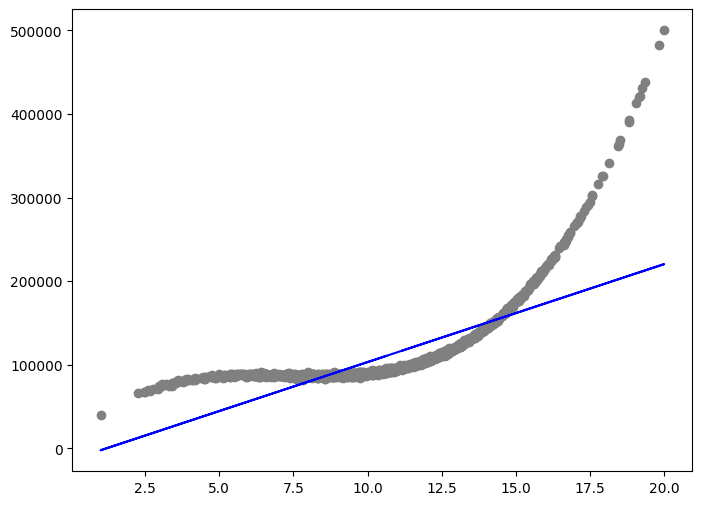

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, y_pred_lr, color='blue')
plt.show()

In [37]:
y_pred_1 = poly.predict(pl.fit_transform(X_train))

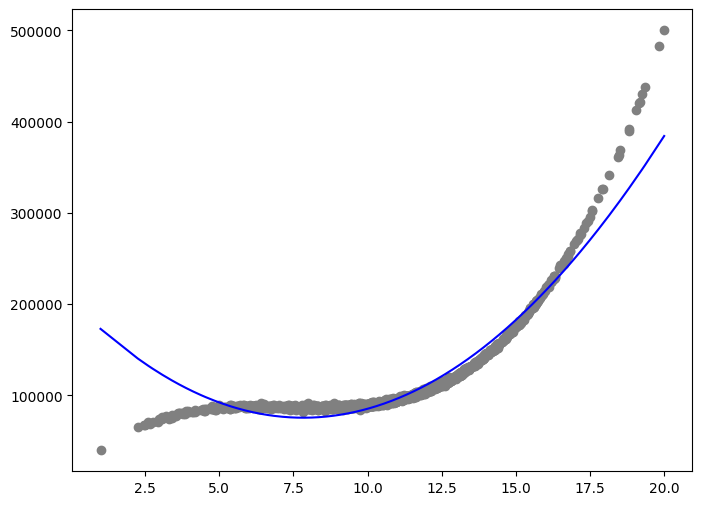

In [38]:
if isinstance(X_train, (pd.DataFrame, pd.Series)):
    X_train_np = X_train.to_numpy().flatten()
else:
    X_train_np = X_train.flatten()

sorted_indices = np.argsort(X_train_np)
sorted_X_train = X_train_np[sorted_indices]
sorted_y_pred_1 = y_pred_1[sorted_indices]

plt.figure(figsize=(8,6))
plt.scatter(X_train_np, y_train, color='gray')
plt.plot(sorted_X_train, sorted_y_pred_1, color='blue')
plt.show()

In [39]:
y_pred_5 = poly5.predict(pl5.fit_transform(X_train))

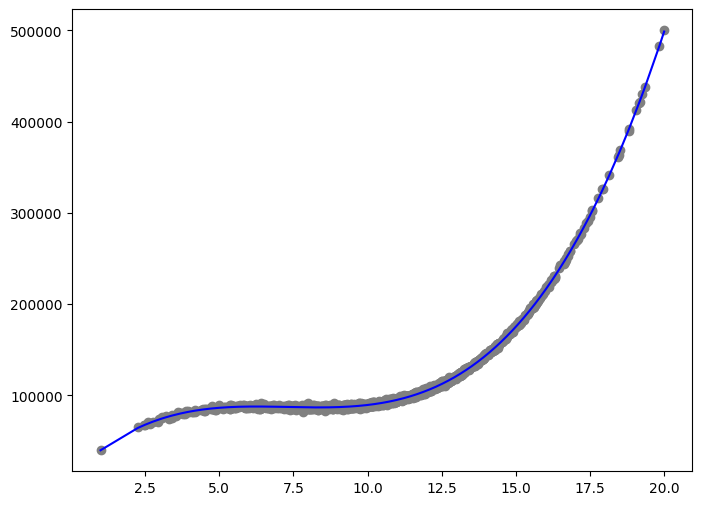

In [40]:
if isinstance(X_train, (pd.DataFrame, pd.Series)):
    X_train_np = X_train.to_numpy().flatten()
else:
    X_train_np = X_train.flatten()

sorted_indices = np.argsort(X_train_np)
sorted_X_train = X_train_np[sorted_indices]
sorted_y_pred_5 = y_pred_5[sorted_indices]

plt.figure(figsize=(8,6))
plt.scatter(X_train_np, y_train, color='gray')
plt.plot(sorted_X_train, sorted_y_pred_5, color='blue')
plt.show()

### Apply Models in Test Set

In [41]:
y_pred_test_lr = lr.predict(X_test)

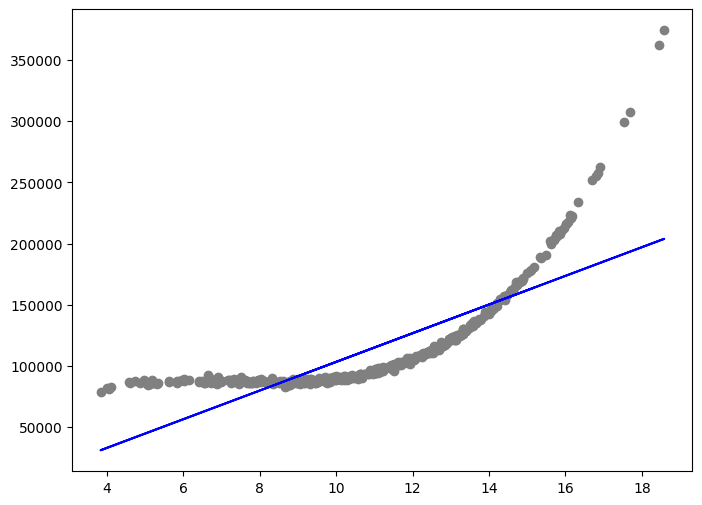

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred_test_lr, color='blue')
plt.show()

In [43]:
y_pred_test_1 = poly.predict(pl.fit_transform(X_test))

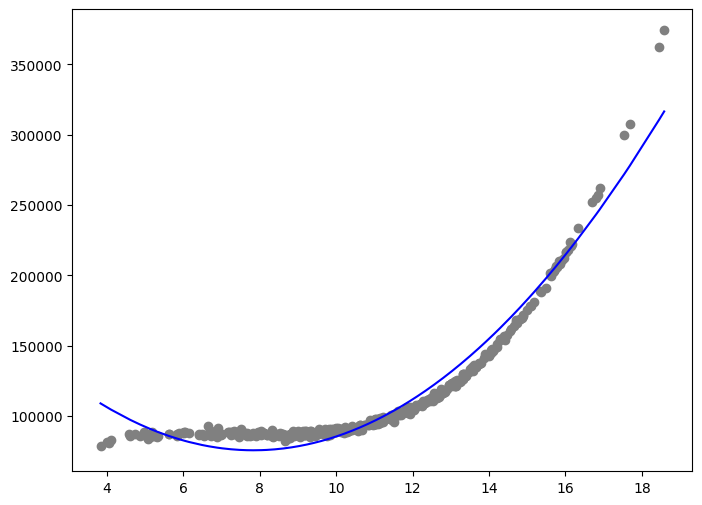

In [44]:
if isinstance(X_test, (pd.DataFrame, pd.Series)):
    X_test_np = X_test.to_numpy().flatten()
else:
    X_test_np = X_test.flatten()

sorted_indices = np.argsort(X_test_np)
sorted_X_test = X_test_np[sorted_indices]
sorted_y_pred_test_1 = y_pred_test_1[sorted_indices]

plt.figure(figsize=(8,6))
plt.scatter(X_test_np, y_test, color='gray')
plt.plot(sorted_X_test, sorted_y_pred_test_1, color='blue')
plt.show()

In [45]:
y_pred_test_5 = poly5.predict(pl5.fit_transform(X_test))

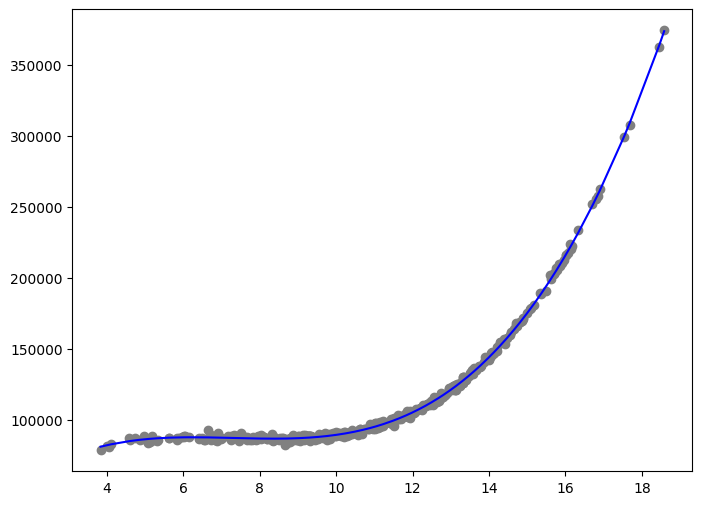

In [46]:
if isinstance(X_test, (pd.DataFrame, pd.Series)):
    X_test_np = X_test.to_numpy().flatten()
else:
    X_test_np = X_test.flatten()

sorted_indices = np.argsort(X_test_np)
sorted_X_test = X_test_np[sorted_indices]
sorted_y_pred_test_5 = y_pred_test_5[sorted_indices]

plt.figure(figsize=(8,6))
plt.scatter(X_test_np, y_test, color='gray')
plt.plot(sorted_X_test, sorted_y_pred_test_5, color='blue')
plt.show()

### Model Performance Evaluation

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### Performance on Training Set

In [48]:
r2 = r2_score(y_train, y_pred_lr)
mae = mean_absolute_error(y_train, y_pred_lr)
mse = mean_squared_error(y_train, y_pred_lr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred_lr)
n = len(y_train)
p = X_train.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.587028960366308
Mean Absolute Error: 19715.257351858014
Mean Squared Error: 865689300.967283
Root Mean Squared Error: 29422.598474085917
Mean Absolute Percentage Error: 0.1744103776933364
Adjusted R-squared: 0.5867705304291155


In [49]:
r2 = r2_score(y_train, y_pred_1)
mae = mean_absolute_error(y_train, y_pred_1)
mse = mean_squared_error(y_train, y_pred_1)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred_1)
n = len(y_train)
p = X_train.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9249213624391699
Mean Absolute Error: 8248.379781792937
Mean Squared Error: 157383368.3961514
Root Mean Squared Error: 12545.25282312602
Mean Absolute Percentage Error: 0.0781983655464803
Adjusted R-squared: 0.9248743795620981


In [50]:
r2 = r2_score(y_train, y_pred_5)
mae = mean_absolute_error(y_train, y_pred_5)
mse = mean_squared_error(y_train, y_pred_5)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_pred_5)
n = len(y_train)
p = X_train.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.999250834715616
Mean Absolute Error: 1007.0094275957966
Mean Squared Error: 1570435.4763533864
Root Mean Squared Error: 1253.170170548831
Mean Absolute Percentage Error: 0.009871079709262993
Adjusted R-squared: 0.9992503659012955


#### Performance on Test Set

In [51]:
r2 = r2_score(y_test, y_pred_test_lr)
mae = mean_absolute_error(y_test, y_pred_test_lr)
mse = mean_squared_error(y_test, y_pred_test_lr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_test_lr)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.642158618183851
Mean Absolute Error: 18328.456469698995
Mean Squared Error: 629477728.3115718
Root Mean Squared Error: 25089.39473784834
Mean Absolute Percentage Error: 0.161864520826491
Adjusted R-squared: 0.6412595192345643


In [52]:
r2 = r2_score(y_test, y_pred_test_1)
mae = mean_absolute_error(y_test, y_pred_test_1)
mse = mean_squared_error(y_test, y_pred_test_1)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_test_1)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.948682476557746
Mean Absolute Error: 7753.290484698513
Mean Squared Error: 90272505.4186232
Root Mean Squared Error: 9501.184421882526
Mean Absolute Percentage Error: 0.07251640942542457
Adjusted R-squared: 0.9485535380566348


In [53]:
r2 = r2_score(y_test, y_pred_test_5)
mae = mean_absolute_error(y_test, y_pred_test_5)
mse = mean_squared_error(y_test, y_pred_test_5)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_test_5)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9989488389376765
Mean Absolute Error: 1087.570323117652
Mean Squared Error: 1849094.3508063143
Root Mean Squared Error: 1359.814086853903
Mean Absolute Percentage Error: 0.010517630711360033
Adjusted R-squared: 0.9989461978294797
